# Config & Import Libraries

In [2]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os
import pickle

# time calculation to track some processes
import time

# imports time series
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# para calculas métricas del modelo
from sklearn.metrics import mean_squared_error

# misc
import os
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# apartado ts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA


# Leemos ficheros

In [60]:
# Leemos los ficheros
ruta = '../data/'
df_forecast = pd.read_csv(ruta+'weekly_sales_cleandata.csv')
df_holidays = pd.read_csv(ruta+'daily_sales_cleandata.csv', usecols=["yearweek", "holiday"])

### Pasamos la columna holiday con eventos al dataframe de Forecast:

In [61]:
df_hol = df_holidays[df_holidays['holiday'] == 1]

In [62]:
df_hol = test.groupby('yearweek')['holiday'].count().to_frame()

In [63]:
df_hol['event'] = 1

In [65]:
del df_hol['holiday']

In [67]:
df_forecast = pd.merge(df_forecast, df_hol, on=['yearweek'], how='left')

In [68]:
df_forecast.head(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,event
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,NaN
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,NaN
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,NaN
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,NaN
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,NaN
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,NaN
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,NaN
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,NaN
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,NaN


In [69]:
df_forecast.fillna(0, inplace=True)

In [71]:
# Modificamos 'event' que es un float a int:
df_forecast['event'] = df_forecast['event'].astype(int)


In [72]:
df_forecast.head(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,event
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,0
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,0
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,0
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,0
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,0
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,0


In [ ]:
#Creamos un diccionario.
store_dict = {

    'South_End': 1,
    'Roxbury': 2,
    'Back_Bay': 3,
    'Greenwich_Village': 4,
    'Harlem' : 5,
    'Tribeca': 6, 
    'Brooklyn': 7,
    'Midtown_Village': 8,
    'Yorktown':9, 
    'Queen_Village': 10

}

In [ ]:
df_forecast["store_encode"]=df_forecast["store"].map(store_dict)

In [ ]:
df_forecast.head(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,1
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,1
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,1
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,1
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,1
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,1
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,1
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,1
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,1


In [ ]:
df_forecast.tail(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode
8354250,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201607,9,1.2,10
8354251,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201608,9,1.2,10
8354252,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201609,15,1.2,10
8354253,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201610,8,1.2,10
8354254,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201611,15,1.2,10
8354255,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201612,17,1.2,10
8354256,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201613,22,1.2,10
8354257,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201614,8,1.2,10
8354258,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201615,0,1.2,10
8354259,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,201616,0,1.2,10


In [ ]:
df_forecast['item'].nunique()

3049

In [ ]:
df_forecast['category'].nunique()

3

In [ ]:
df_forecast['department'].nunique()

7

In [ ]:
df_forecast['department'].value_counts()

department
SUPERMARKET_3      2255020
HOME_&_GARDEN_1    1457680
HOME_&_GARDEN_2    1411100
ACCESORIES_1       1139840
SUPERMARKET_2      1090520
SUPERMARKET_1       591840
ACCESORIES_2        408260
Name: count, dtype: int64

In [ ]:
df_forecast.head(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode,department_encode
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,1,4
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1,4
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,1,4
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,1,4
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,1,4
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,1,4
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,1,4
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,1,4
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,1,4
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,1,4


In [ ]:
department_dict = {

    'SUPERMARKET_3': 1,      
    'HOME_&_GARDEN_1' : 2,   
    'HOME_&_GARDEN_2' :3, 
    'ACCESORIES_1' :4,      
    'SUPERMARKET_2': 5,  
    'SUPERMARKET_1':6,       
    'ACCESORIES_2':7       

}

In [ ]:
df_forecast["department_encode"]=df_forecast["department"].map(department_dict)

In [ ]:
df_forecast['store'].nunique()

10

In [ ]:
df_forecast['store_code'].nunique()

10

In [ ]:
df_forecast['store_code'].value_counts()

store_code
BOS_1    835426
BOS_2    835426
BOS_3    835426
NYC_1    835426
NYC_2    835426
NYC_3    835426
NYC_4    835426
PHI_1    835426
PHI_2    835426
PHI_3    835426
Name: count, dtype: int64

In [ ]:
df_forecast['store'].value_counts()

store
South_End            835426
Roxbury              835426
Back_Bay             835426
Greenwich_Village    835426
Harlem               835426
Tribeca              835426
Brooklyn             835426
Midtown_Village      835426
Yorktown             835426
Queen_Village        835426
Name: count, dtype: int64

In [ ]:
df_forecast['store_encode'].value_counts()

store_encode
1     835426
2     835426
3     835426
4     835426
5     835426
6     835426
7     835426
8     835426
9     835426
10    835426
Name: count, dtype: int64

In [ ]:
df_forecast['region'].nunique()

3

In [ ]:
df_forecast.isnull().sum()

id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
yearweek      0
qty_sold      0
sell_price    0
dtype: int64

In [ ]:
df_forecast.head(25)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,1
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,1
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,1
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,1
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,1
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,1
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,1
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,1
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,1


In [ ]:
df_forecast['category'].value_counts()

category
SUPERMARKET      3937380
HOME_&_GARDEN    2868780
ACCESORIES       1548100
Name: count, dtype: int64

In [ ]:
category_dict = {

    'SUPERMARKET': 1,
    'HOME_&_GARDEN': 2,
    'ACCESORIES': 3
   
}

In [ ]:
df_forecast["category_encode"]=df_forecast["category"].map(category_dict)

In [ ]:
df_forecast['region'].value_counts()

region
New York        3341704
Boston          2506278
Philadelphia    2506278
Name: count, dtype: int64

In [ ]:
region_dict ={

    'New York': 1,
    'Boston': 2,
    'Philadelphia':3

}

In [ ]:
df_forecast["region_encode"]=df_forecast["region"].map(region_dict)

In [ ]:
df_forecast['store_code'].value_counts()

store_code
BOS_1    835426
BOS_2    835426
BOS_3    835426
NYC_1    835426
NYC_2    835426
NYC_3    835426
NYC_4    835426
PHI_1    835426
PHI_2    835426
PHI_3    835426
Name: count, dtype: int64

In [ ]:
df_forecast['store'].value_counts()

store
South_End            835426
Roxbury              835426
Back_Bay             835426
Greenwich_Village    835426
Harlem               835426
Tribeca              835426
Brooklyn             835426
Midtown_Village      835426
Yorktown             835426
Queen_Village        835426
Name: count, dtype: int64

In [ ]:
df_forecast.head(10)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode,department_encode,category_encode,region_encode
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,1,4,3,2
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1,4,3,2
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,1,4,3,2
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,1,4,3,2
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,1,4,3,2
5,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201109,0,12.7414,1,4,3,2
6,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201110,0,12.7414,1,4,3,2
7,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201111,0,12.7414,1,4,3,2
8,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201112,0,12.7414,1,4,3,2
9,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201113,0,12.7414,1,4,3,2


In [ ]:
df_forecast[df_forecast['store_code'] == 'BOS_1']

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,store_encode,department_encode,category_encode,region_encode
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414,1,4,3,2
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414,1,4,3,2
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414,1,4,3,2
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414,1,4,3,2
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351789,SUPERMARKET_3_827_BOS_1,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,201612,1,1.2000,1,1,1,2
8351790,SUPERMARKET_3_827_BOS_1,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,201613,8,1.2000,1,1,1,2
8351791,SUPERMARKET_3_827_BOS_1,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,201614,17,1.2000,1,1,1,2
8351792,SUPERMARKET_3_827_BOS_1,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,201615,20,1.2000,1,1,1,2


In [ ]:
df_forecast.groupby(['store', 'store_code'])['qty_sold'].sum().reset_index()

,store,store_code,qty_sold
0,Back_Bay,BOS_3,6089330
1,Brooklyn,NYC_4,4103676
2,Greenwich_Village,NYC_1,7698216
3,Harlem,NYC_2,5685475
4,Midtown_Village,PHI_1,5149062
5,Queen_Village,PHI_3,6427782
6,Roxbury,BOS_2,7214384
7,South_End,BOS_1,5595292
8,Tribeca,NYC_3,11188180
9,Yorktown,PHI_2,6544012


In [ ]:
df_forecast.groupby(['item'])['qty_sold'].sum().reset_index()

,item,qty_sold
0,ACCESORIES_1_001,4093
1,ACCESORIES_1_002,5059
2,ACCESORIES_1_003,1435
3,ACCESORIES_1_004,39175
4,ACCESORIES_1_005,14621
...,...,...
3044,SUPERMARKET_3_823,15388
3045,SUPERMARKET_3_824,8325
3046,SUPERMARKET_3_825,13526
3047,SUPERMARKET_3_826,12188


In [25]:
#Después d elas comprobaciones, vamos a borrar las siguientes columnas: 'item','store_code' y 'store' porque ya está encodeada en 'store_encode'
df_forecast.drop(['category','department', 'region', 'store', 'store_code','item' ], axis=1, inplace=True)

In [26]:
df_forecast.head()

,id,yearweek,qty_sold,sell_price,store_encode,department_encode,category_encode,region_encode
0,ACCESORIES_1_001_BOS_1,201104,0,12.7414,1,4,3,2
1,ACCESORIES_1_001_BOS_1,201105,0,12.7414,1,4,3,2
2,ACCESORIES_1_001_BOS_1,201106,0,12.7414,1,4,3,2
3,ACCESORIES_1_001_BOS_1,201107,0,12.7414,1,4,3,2
4,ACCESORIES_1_001_BOS_1,201108,0,12.7414,1,4,3,2


In [27]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 object 
 1   yearweek           int64  
 2   qty_sold           int64  
 3   sell_price         float64
 4   store_encode       int64  
 5   department_encode  int64  
 6   category_encode    int64  
 7   region_encode      int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 509.9+ MB


In [ ]:
#Pasamos 'yearweek' a formado datetime.


In [11]:
# Tras analizar, imputamos para algunos registros nulos forward fill y los otros con backfill
'''df_forecast['sell_price'].ffill(inplace=True)
   df_forecast['sell_price'].bfill(inplace=True)'''

"df_forecast['sell_price'].ffill(inplace=True)\n   df_forecast['sell_price'].bfill(inplace=True)"

In [12]:
# Creamos la variable sales_values. Para hacer el forecast en valores, redondeamos y la convertimos en Entero.
# Hay que redondear, sino redondea para abajo el resultado.
'''df_forecast['sales_values'] = df_forecast['qty_sold'] * df_forecast['sell_price']
df_forecast['sales_values'] = df_forecast['sales_values'].round().astype(int)'''


In [13]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   region      object 
 7   yearweek    int64  
 8   qty_sold    int64  
 9   sell_price  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 637.4+ MB


In [7]:
# Miramos cuantos registros de todo mi dataset tienen ventas>0, 7.502.332 de registros (bajamos a la mitad del dataset, antes eran 16 mio registros)
# las ventas nulas o cero no proporcionan información útil para el modelo de pronóstico, y pueden introducir ruido en los resultados
# Hacemos un df llamado df_forecast2, para trabajar con este. Incluimos registros con venta 0. 
df_forecast2= df_forecast[df_forecast["qty_sold"]>=0]

In [8]:
#Comprobamos nuestro nuevo df_forecast2, excluyendo ventas <0
df_forecast2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   region      object 
 7   yearweek    int64  
 8   qty_sold    int64  
 9   sell_price  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 637.4+ MB


In [16]:
df_forecast2.head(3)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414


In [17]:
df_forecast2["qty_sold"].sum() #La cantidad vendida es de: 65695409

65695409

In [18]:
'''#Agrupamos por todos los "id", los "sales_values". Ojo no tenemos en cuenta el año/periodo de tiempo, es solo para ver ítems más vendidos
df_forecast3=df_forecast2.groupby('id')['sales_values'].sum().reset_index().sort_values(by='sales_values', ascending=False)
df_forecast3['acum_sales'] = df_forecast3['sales_values'].cumsum()'''

'#Agrupamos por todos los "id", los "sales_values". Ojo no tenemos en cuenta el año/periodo de tiempo, es solo para ver ítems más vendidos\ndf_forecast3=df_forecast2.groupby(\'id\')[\'sales_values\'].sum().reset_index().sort_values(by=\'sales_values\', ascending=False)\ndf_forecast3[\'acum_sales\'] = df_forecast3[\'sales_values\'].cumsum()'

In [19]:
'''# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby(['id', 'qty_sold']).sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)

# Calcula la columna de acumulado ('acum_sales')
df_forecast3['qty_sold'] = df_forecast3.groupby('id')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)'''

"# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo\ndf_forecast3 = df_forecast2.groupby(['id', 'qty_sold']).sum().reset_index()\n\n# Ordena el DataFrame resultante por 'sales_values' en orden descendente\ndf_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)\n\n# Calcula la columna de acumulado ('acum_sales')\ndf_forecast3['qty_sold'] = df_forecast3.groupby('id')['qty_sold'].cumsum()\n\n# Muestra el DataFrame resultante\nprint(df_forecast3)"

In [20]:
'''# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby(['id', 'qty_sold'])['sales_values'].sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='sales_values', ascending=False)

# Calcula la columna de acumulado de 'qty_sold' ('acum_qty_sold')
df_forecast3['acum_qty_sold'] = df_forecast3.groupby('id')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)'''

"# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo\ndf_forecast3 = df_forecast2.groupby(['id', 'qty_sold'])['sales_values'].sum().reset_index()\n\n# Ordena el DataFrame resultante por 'sales_values' en orden descendente\ndf_forecast3 = df_forecast3.sort_values(by='sales_values', ascending=False)\n\n# Calcula la columna de acumulado de 'qty_sold' ('acum_qty_sold')\ndf_forecast3['acum_qty_sold'] = df_forecast3.groupby('id')['qty_sold'].cumsum()\n\n# Muestra el DataFrame resultante\nprint(df_forecast3)"

In [21]:
'''# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby['id']['qty_sold'].sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)

# Calcula la columna de acumulado ('acum_sales')
df_forecast3['qty_sold_acum'] = df_forecast3.groupby('id', 'date')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)
'''

"# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo\ndf_forecast3 = df_forecast2.groupby['id']['qty_sold'].sum().reset_index()\n\n# Ordena el DataFrame resultante por 'sales_values' en orden descendente\ndf_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)\n\n# Calcula la columna de acumulado ('acum_sales')\ndf_forecast3['qty_sold_acum'] = df_forecast3.groupby('id', 'date')['qty_sold'].cumsum()\n\n# Muestra el DataFrame resultante\nprint(df_forecast3)\n"

In [9]:
df_forecast2.sort_values(["id", "yearweek"], ascending = True, inplace = True)
# Ordena el DataFrame, primero se ordena por la columna "id" de manera ascendente y, en caso de empate en "id",
# se ordena por la columna "yearweek" de manera ascendente también.

In [11]:
df_forecast2.head(5)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,0,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201105,0,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201106,0,12.7414
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201107,0,12.7414
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201108,0,12.7414


In [12]:
MIN_DATE = df_forecast2["yearweek"].min()  #yearweek
MAX_DATE = df_forecast2["yearweek"].max()  #yeaweek

In [13]:
print(f"Min date is {MIN_DATE}\nMax date is {MAX_DATE}")

Min date is 201104
Max date is 201616


In [14]:
#Total de series temporales:
df_forecast2["id"].nunique()

30490

In [27]:
df_forecast2["id"].value_counts()

id
ACCESORIES_1_001_BOS_1       274
SUPERMARKET_2_206_BOS_3      274
SUPERMARKET_2_207_NYC_2      274
SUPERMARKET_2_207_NYC_1      274
SUPERMARKET_2_207_BOS_3      274
                            ... 
HOME_&_GARDEN_1_460_PHI_3    274
HOME_&_GARDEN_1_460_PHI_2    274
HOME_&_GARDEN_1_460_PHI_1    274
HOME_&_GARDEN_1_460_NYC_4    274
SUPERMARKET_3_827_PHI_3      274
Name: count, Length: 30490, dtype: int64

In [15]:
#Voy a coger una serie temporal.
ts = df_forecast2[df_forecast2['id'] == 'SUPERMARKET_2_206_BOS_3']
ts

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
5568228,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201104,0,13.176
5568229,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201105,0,13.176
5568230,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201106,0,13.176
5568231,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201107,0,13.176
5568232,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201108,0,13.176
...,...,...,...,...,...,...,...,...,...,...
5568497,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201612,3,11.976
5568498,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201613,4,11.976
5568499,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201614,3,11.976
5568500,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201615,1,11.976


In [16]:
#Convertimos la fecha a formato datetime y creamos columnas Month y Year

ts['week'] = ts['yearweek'].astype(str).str[4:]
ts['year'] = ts['yearweek'].astype(str).str[:4]

In [18]:
ts.head(4)

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,week,year
5568228,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201104,0,13.176,04,2011
5568229,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201105,0,13.176,05,2011
5568230,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201106,0,13.176,06,2011
5568231,SUPERMARKET_2_206_BOS_3,SUPERMARKET_2_206,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,201107,0,13.176,07,2011


<Axes: xlabel='year'>

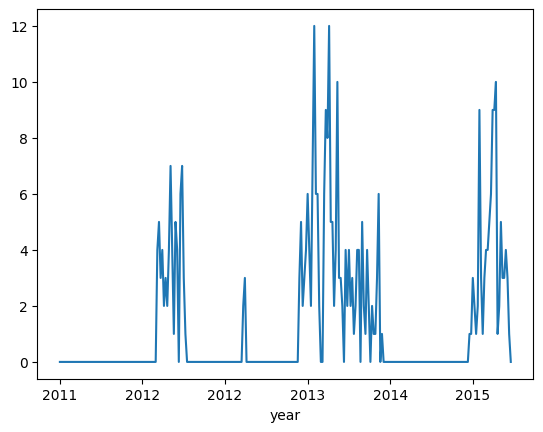

In [21]:
ts.set_index('year')['qty_sold'].plot()  

In [24]:
#Voy a coger otra serie temporal.
ts1 = df_forecast2[df_forecast2['id'] == 'HOME_&_GARDEN_1_460_PHI_1']
ts1

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
2783018,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201104,7,4.9625
2783019,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201105,18,4.9625
2783020,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201106,19,4.9625
2783021,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201107,26,4.9625
2783022,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201108,28,4.9625
...,...,...,...,...,...,...,...,...,...,...
2783287,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201612,3,4.8500
2783288,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201613,8,4.8500
2783289,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201614,1,4.8500
2783290,HOME_&_GARDEN_1_460_PHI_1,HOME_&_GARDEN_1_460,HOME_&_GARDEN,HOME_&_GARDEN_1,Midtown_Village,PHI_1,Philadelphia,201615,5,4.8500


In [25]:
ts1.set_index('year')['qty_sold'].plot()

KeyError: "None of ['year'] are in the columns"

In [26]:
df_forecast2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   region      object 
 7   yearweek    int64  
 8   qty_sold    int64  
 9   sell_price  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 637.4+ MB


In [33]:
'''import pandas as pd

# Supongamos que tienes un DataFrame df_forecast2 con tus datos
# df_forecast2 = ...

# Calcular la correlación entre todas las variables en tu serie temporal
correlation_matrix = df_forecast2.corr()

# Visualizar la matriz de correlación como un mapa de calor
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()'''


'import pandas as pd\n\n# Supongamos que tienes un DataFrame df_forecast2 con tus datos\n# df_forecast2 = ...\n\n# Calcular la correlación entre todas las variables en tu serie temporal\ncorrelation_matrix = df_forecast2.corr()\n\n# Visualizar la matriz de correlación como un mapa de calor\nimport seaborn as sns\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Matriz de correlación entre variables\')\nplt.show()'

In [34]:
df_forecast2.isnull().sum() #No hay nulos.

id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
yearweek      0
qty_sold      0
sell_price    0
dtype: int64

In [35]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Supongamos que tienes un DataFrame df_forecast2 con tus datos
# df_forecast2 = ...

# Calcular y visualizar las PACF para cada serie temporal individual identificada por 'id'
for id_val, group_data in df_forecast2.groupby('id'):
    fig, ax = plt.subplots(figsize=(10, 5))
    # Calcular PACF solo para los datos de 'qty_sold' (ajusta según tus necesidades)
    pacf_values = pd.Series([group_data['qty_sold'].autocorr(lag) for lag in range(1, 21)], index=range(1, 21))
    ax.bar(pacf_values.index, pacf_values)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_title(f'PACF para la serie temporal del ID {id_val}')
    ax.set_xlabel('Retraso')
    ax.set_ylabel('PACF')
    plt.show()'''


"import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom statsmodels.graphics.tsaplots import plot_pacf\n\n# Supongamos que tienes un DataFrame df_forecast2 con tus datos\n# df_forecast2 = ...\n\n# Calcular y visualizar las PACF para cada serie temporal individual identificada por 'id'\nfor id_val, group_data in df_forecast2.groupby('id'):\n    fig, ax = plt.subplots(figsize=(10, 5))\n    # Calcular PACF solo para los datos de 'qty_sold' (ajusta según tus necesidades)\n    pacf_values = pd.Series([group_data['qty_sold'].autocorr(lag) for lag in range(1, 21)], index=range(1, 21))\n    ax.bar(pacf_values.index, pacf_values)\n    ax.axhline(y=0, color='black', linestyle='--')\n    ax.set_title(f'PACF para la serie temporal del ID {id_val}')\n    ax.set_xlabel('Retraso')\n    ax.set_ylabel('PACF')\n    plt.show()"

Gráficos:

In [36]:
yearweek_column = df_forecast2.pop('yearweek')
id_column = df_forecast2.pop('id')
df_forecast2.insert(0, 'yearweek', yearweek_column)
df_forecast2.insert(1, 'id', id_column)

In [37]:
def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2, lags = 14)
    plot_pacf(x = y, ax = ax3, lags = 14)

    plt.suptitle(t = title, fontsize = 20)

In [38]:
#y = df_forecast2.set_index("yearweek").resample("W")["qty_sold"].sum()[:-4] # quitamos los registros de abril

In [39]:
#plot_ts_acf_pacf(y = y, title = "Monthly Sales for all items in all shops");

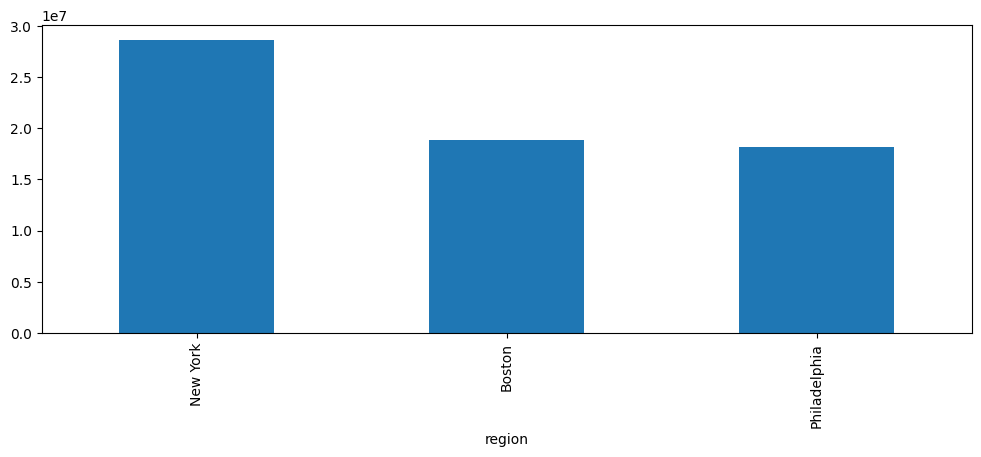

In [40]:
(
    df_forecast2.
    groupby(["region"])
    ["qty_sold"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

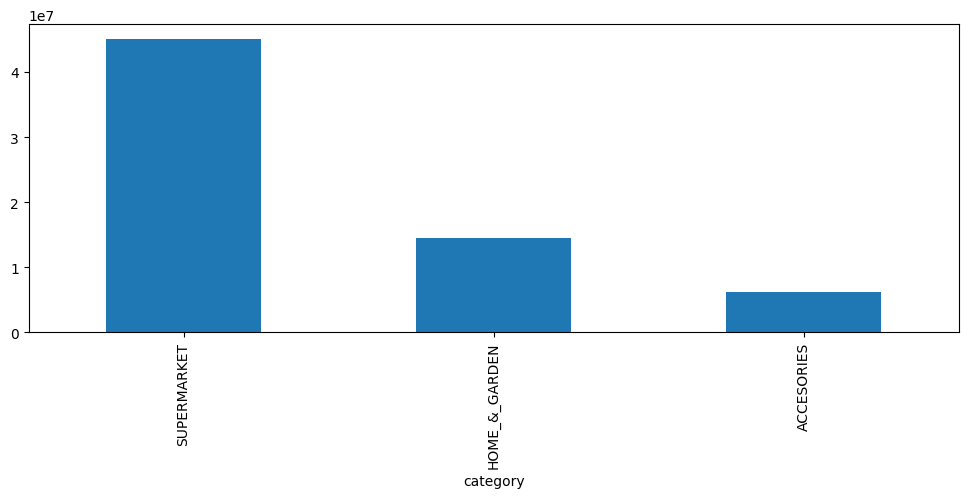

In [41]:
(
    df_forecast2.
    groupby(["category"])
    ["qty_sold"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

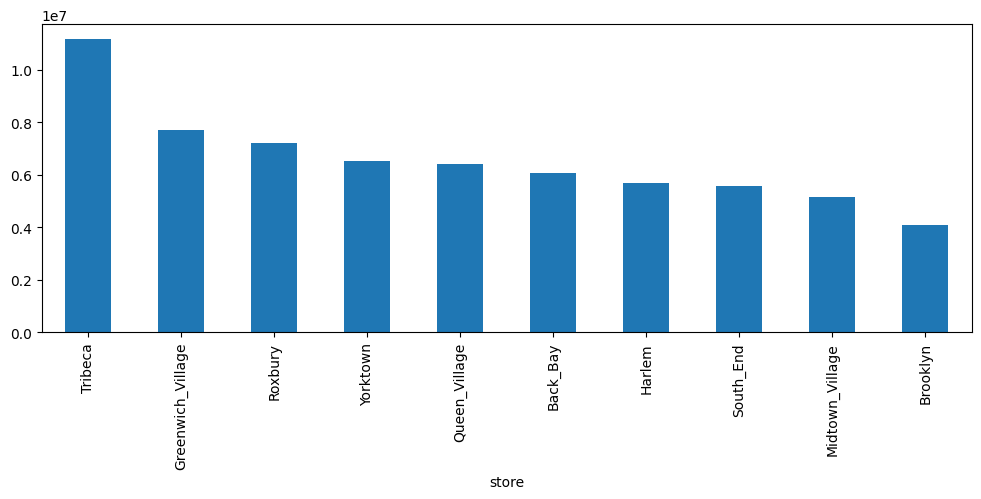

In [42]:
(
    df_forecast2.
    groupby(["store"])
    ["qty_sold"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

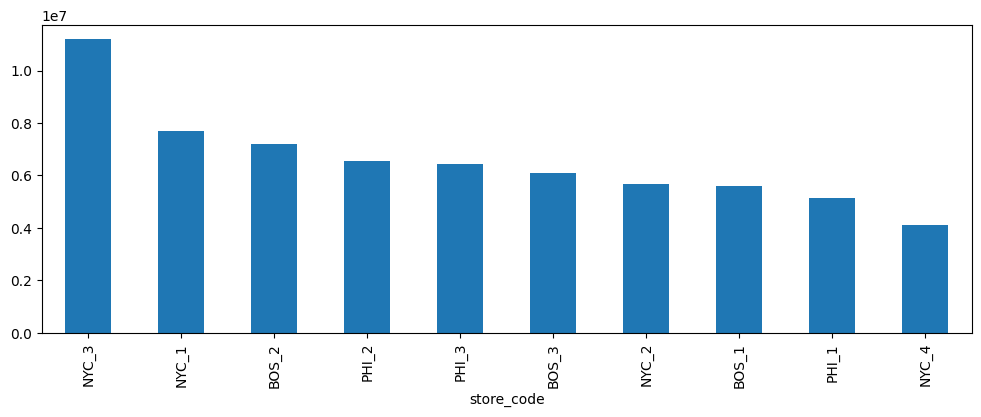

In [43]:
(
    df_forecast2.
    groupby(["store_code"])
    ["qty_sold"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

In [44]:
# Aquí agrupamos por 'qty_sold' e 'id' y aplicamos alguna función de agregación, por ejemplo, la suma de 'qty_sold'
#df_agrupado = df_forecast2.groupby(['qty_sold', 'id']).sum().reset_index()

Creación de Variables nuevas:

In [54]:
import pandas as pd

# Supongamos que 'df' contiene tus datos de series temporales
# Asegúrate de que 'df' esté ordenado temporalmente por 'yearweek' antes de aplicar el desplazamiento

# Define el número de períodos de tiempo para el retraso
lags = 3

# Crea características de retraso para la columna 'qty_sold'
for i in range(1, lags + 1):
    df_forecast2[f'qty_sold_lag_{i}'] = df_forecast2['qty_sold'].shift(i)

# Elimina las filas con valores NaN resultantes del desplazamiento
df_forecast2.dropna(inplace=True)


In [ ]:
# Supongamos que df_forecast2 es tu DataFrame
'''df_forecast2['yearweek'] = pd.to_datetime(df_forecast2['fecha'])'''

In [56]:
from sklearn.model_selection import train_test_split

# Calcula el total de facturación
total_facturacion = df_forecast2['qty_sold'].sum()

# Ordena los datos por facturación en orden descendente
df_forecast2_sorted = df_forecast2.sort_values(by='qty_sold', ascending=False)

# Calcula la facturación acumulada
df_forecast2_sorted['facturacion_acumulada'] = df_forecast2_sorted['qty_sold'].cumsum()

# Encuentra el índice donde la facturación acumulada alcanza el 60% del total
index_60_percent = df_forecast2_sorted[df_forecast2_sorted['facturacion_acumulada'] >= 0.6 * total_facturacion].index[0]

# Filtra los "id" que representan el 60% de la facturación total
ids_60_percent_facturacion = df_forecast2_sorted.loc[:index_60_percent, 'id']

# Filtra el DataFrame original usando los "id" seleccionados
df_filtered = df_forecast2[df_forecast2['id'].isin(ids_60_percent_facturacion)]

# Define tus características (X) y tu variable objetivo (y)
X = df_filtered.drop(columns=['qty_sold'])
y = df_filtered['qty_sold']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
'''from sklearn.preprocessing import LabelEncoder

# Seleccionar columnas categóricas
categorical_cols = ['item', 'category', 'department', 'store', 'store_code', 'region']

# Aplicar Label Encoding a las columnas categóricas
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    label_encoders[col] = encoder

# Ahora puedes proceder a dividir los datos y entrenar el modelo XGBoost'''



In [21]:
'''from scipy.sparse import csr_matrix

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Concatenar las columnas codificadas con las características originales
X = pd.concat([X.drop(columns=categorical_cols), pd.DataFrame(X_encoded)], axis=1)

# Convertir la matriz codificada a una matriz dispersa csr_matrix
X_encoded_sparse = csr_matrix(X_encoded)'''


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar el modelo XGBRegressor
model = XGBRegressor()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


In [23]:
X.head(1)

,id,yearweek,sell_price,0
4658,ACCESORIES_1_002_PHI_1,201104.0,5.2801,"(0, 4)\t1.0\n (0, 2096)\t1.0\n (0, 2099)\t..."


Codificar las variables categoricas:

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas
df_encoded = ['item', 'category', 'department', 'store', 'store_code', 'region']

# Aplicar Label Encoding a las variables categóricas manteniendo el orden
label_encoders = {}
for column in df_encoded:
    label_encoders[column] = LabelEncoder()
    df_forecast2[column] = label_encoders[column].fit_transform(df_forecast2[column])

# Ahora las variables categóricas han sido codificadas manteniendo el orden


In [31]:
df_forecast2.head(2)                
               

,id,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
0,ACCESORIES_1_001_BOS_1,0,0,0,7,0,0,201104,0,12.7414
1,ACCESORIES_1_001_BOS_1,0,0,0,7,0,0,201105,0,12.7414


In [ ]:
'''# Codificar variables categóricas: Getdummies
import pandas as pd

# Copiar el DataFrame original para no modificarlo directamente
#df_encoded = df_forecast2.copy()

# Codificar variables categóricas utilizando get_dummies
df_forecast2= pd.get_dummies(df_forecast2, columns=["item","category", "department", "store", "store_code","region"])

# Si deseas conservar el DataFrame original, puedes eliminar las columnas originales después de codificarlas
# df_encoded.drop(columns=categorical_cols, inplace=True)

#DA ERROR DE MEMORIA'''

In [15]:
'''from sklearn.preprocessing import OrdinalEncoder

# Lista de variables categóricas que deseas codificar de forma ordinal
categorical_cols = ["item", "category", "department", "store", "store_code", "region"]

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Codificar las variables categóricas utilizando el codificador ordinal
df_forecast2[categorical_cols] = ordinal_encoder.fit_transform(df_forecast2[categorical_cols])

# Ahora, las variables categóricas han sido codificadas de forma ordinal en tu DataFrame
print(df_forecast2.head())'''

                       id  item  category  department  store  store_code  \
4  ACCESORIES_1_001_BOS_1   0.0       0.0         0.0    7.0         0.0   
5  ACCESORIES_1_001_BOS_1   0.0       0.0         0.0    7.0         0.0   
6  ACCESORIES_1_001_BOS_1   0.0       0.0         0.0    7.0         0.0   
7  ACCESORIES_1_001_BOS_1   0.0       0.0         0.0    7.0         0.0   
8  ACCESORIES_1_001_BOS_1   0.0       0.0         0.0    7.0         0.0   

   region  yearweek  qty_sold  sell_price  qty_sold_lag_1  qty_sold_lag_2  \
4     0.0    201108         0     12.7414             0.0             0.0   
5     0.0    201109         0     12.7414             0.0             0.0   
6     0.0    201110         0     12.7414             0.0             0.0   
7     0.0    201111         0     12.7414             0.0             0.0   
8     0.0    201112         0     12.7414             0.0             0.0   

   qty_sold_lag_3  qty_sold_lag_4  
4             0.0             0.0  
5       

Hacemos pruebas:

In [32]:
# Establecer 'id' como índice
df_forecast2.set_index('id', inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

# Calcula el total de facturación
total_facturacion = df_forecast2['facturacion'].sum()

# Ordena los datos por facturación en orden descendente
df_forecast2_sorted = df_forecast2.sort_values(by='facturacion', ascending=False)

# Calcula la facturación acumulada
df_forecast2_sorted['facturacion_acumulada'] = df_forecast2_sorted['facturacion'].cumsum()

# Encuentra el índice donde la facturación acumulada alcanza el 60% del total
index_60_percent = df_forecast2_sorted[df_forecast2_sorted['facturacion_acumulada'] >= 0.6 * total_facturacion].index[0]

# Filtra los "id" que representan el 60% de la facturación total
ids_60_percent_facturacion = df_forecast2_sorted.loc[:index_60_percent, 'id']

# Filtra el DataFrame original usando los "id" seleccionados
df_filtered = df_forecast2[df_forecast2['id'].isin(ids_60_percent_facturacion)]

# Define tus características (X) y tu variable objetivo (y)
X = df_filtered.drop(columns=['qty_sold'])
y = df_filtered['qty_sold']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: 'facturacion'

In [24]:
from sklearn.model_selection import train_test_split

# Define tus características (X) y tu variable objetivo (y)
X = df_forecast2.drop(columns=['qty_sold'])
y = df_forecast2['qty_sold']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Entero mi modelo
import xgboost as xgb

# Crea y entrena el modelo XGBoost
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Haz predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el MSE y el R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 77.73920381064548
R²: 0.8590036037894864


In [25]:
# Haz predicciones en todo el conjunto de datos
y_pred_all = model.predict(X)

# Haz predicciones sobre nuevas muestras de datos
#new_data = ...
#new_predictions = model.predict(new_data)


Fin de pruebas.

Inicio de Pruebas parte 2:

In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un DataFrame llamado df_forecast2 con tus datos

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_forecast2.drop(columns=['qty_sold'])  # Características
y = df_forecast2['qty_sold']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Realizar pronóstico en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de entrenamiento y validación
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5

mse_valida = mean_squared_error(y_test, y_pred)
rmse_valida = mse_valida ** 0.5

print(f"Train RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_valida}")


Train RMSE: 8.827570567492609
Validation RMSE: 9.023460405557191


Pruebas parte 3: Modelo ARIMA

In [20]:
df_forecast2.head(1)                  

,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price,qty_sold_lag_1,qty_sold_lag_2,qty_sold_lag_3,qty_sold_lag_4
id,,,,,,,,,,,,,
ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,201108,0,12.7414,0.0,0.0,0.0,0.0


In [23]:
# Antes de codificar las variables categóricas, asegúrate de que 'id' esté como una columna en el DataFrame
# Si 'id' era el índice antes de la codificación, puedes hacer lo siguiente para restaurarlo después de la codificación:

# 1. Restaurar 'id' como una columna en el DataFrame codificado
'''df_encoded['id'] = df_encoded.index.get_level_values('id')

# 2. Volver a establecer 'id' como el índice
df_encoded.set_index('id', inplace=True)'''


"df_encoded['id'] = df_encoded.index.get_level_values('id')\n\n# 2. Volver a establecer 'id' como el índice\ndf_encoded.set_index('id', inplace=True)"

In [24]:
df_forecast2.head(1)

,yearweek,id,item,category,department,store,store_code,region,qty_sold,sell_price
0,201104,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,0,12.7414


In [25]:
df_encoded = df_forecast2.copy()

In [ ]:
#df_encoded.sort_values(["id", "yearweek"], ascending = True, inplace = True)

In [26]:
def build_ts_vars(df_encoded, gb_list, target_column, agg_func, agg_func_name):
    assert "yearweek" in df_encoded.columns.tolist(), "yearweek must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    gb_df_ = (
        df_encoded
        .groupby(gb_list + ["yearweek"])
        .agg({target_column: agg_func})
        .reset_index()
        .rename(
            columns={
                target_column: new_name
            }
        )
    )

    gb_df_[f"{new_name}_lag1"] = gb_df_.groupby(gb_list)[new_name].transform(
        lambda series: series.shift(1)
    )

    print(f"Dropping columns that might cause target leakage: {new_name}")
    gb_df_.drop(new_name, inplace=True, axis=1)

    return gb_df_


In [30]:
'''def build_ts_vars(df_encoded, gb_list, target_column, agg_func, agg_func_name):
    assert "yearweek" in df_encoded.columns.tolist(), "yearweek must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    gb_df_ = (
        df_encoded
        .groupby(gb_list + [df_encoded.index.get_level_values('id'), "yearweek"])  # Accede al índice para obtener el 'id'
        .agg({target_column: agg_func})
        .reset_index()
        .rename(
            columns={
                target_column: new_name
            }
        )
    )

    gb_df_[f"{new_name}_lag1"] = gb_df_.groupby(gb_list)[new_name].transform(
        lambda series: series.shift(1)
    )

    print(f"Dropping columns that might cause target leakage: {new_name}")
    gb_df_.drop(new_name, inplace=True, axis=1)

    return gb_df_'''


In [34]:
def build_ts_vars(df_encoded, gb_list, target_column, agg_func, agg_func_name):
    assert "yearweek" in df_encoded.columns.tolist(), "yearweek must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    # Asignar nombre al nivel del índice 'id'
    df_encoded.index.set_names('id', level=None, inplace=True)

    gb_df_ = (
        df_encoded
        .groupby(gb_list + ["yearweek"])  # No incluir "id" en la operación groupby, ya que es el índice
        .agg({target_column: agg_func})
        .reset_index()
        .rename(
            columns={
                target_column: new_name
            }
        )
    )

    gb_df_[f"{new_name}_lag1"] = gb_df_.groupby(gb_list)[new_name].transform(
        lambda series: series.shift(1)
    )

    print(f"Dropping columns that might cause target leakage: {new_name}")
    gb_df_.drop(new_name, inplace=True, axis=1)

    return gb_df_


In [46]:
df_encoded.head(2)

,item,category,department,store,store_code,region,yearweek,qty_sold,sell_price
id,,,,,,,,,
0,0,0,0,7,0,0,201104,0,12.7414
1,0,0,0,7,0,0,201105,0,12.7414


In [27]:
GB_LIST = ["id"]
TARGET_COLUMN = "qty_sold"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "sum"

vars_ts_ = build_ts_vars(
    df_encoded = df_encoded,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_.head(10)

Dropping columns that might cause target leakage: id_qty_sold_sum


,id,yearweek,id_qty_sold_sum_lag1
0,ACCESORIES_1_001_BOS_1,201104,NaN
1,ACCESORIES_1_001_BOS_1,201105,0.0
2,ACCESORIES_1_001_BOS_1,201106,0.0
3,ACCESORIES_1_001_BOS_1,201107,0.0
4,ACCESORIES_1_001_BOS_1,201108,0.0
5,ACCESORIES_1_001_BOS_1,201109,0.0
6,ACCESORIES_1_001_BOS_1,201110,0.0
7,ACCESORIES_1_001_BOS_1,201111,0.0
8,ACCESORIES_1_001_BOS_1,201112,0.0
9,ACCESORIES_1_001_BOS_1,201113,0.0


In [28]:
print(df_encoded.shape)

df = pd.merge(df_encoded, vars_ts_, on = ["yearweek"] + GB_LIST, how = "left")

print(df.shape)

(8354260, 10)
(8354260, 11)


TRAIN TEST SPLIT

In [29]:
df.columns.tolist()

['yearweek',
 'id',
 'item',
 'category',
 'department',
 'store',
 'store_code',
 'region',
 'qty_sold',
 'sell_price',
 'id_qty_sold_sum_lag1']

In [30]:
COLUMNS_TO_DROP = [
]

df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [31]:
df.set_index("id", inplace = True)

In [32]:
df.sample(5)

,yearweek,item,category,department,store,store_code,region,qty_sold,sell_price,id_qty_sold_sum_lag1
id,,,,,,,,,,
SUPERMARKET_3_006_NYC_4,201508,2231.0,2.0,6.0,1.0,6.0,1.0,0,9.4560,0.0
HOME_&_GARDEN_1_489_BOS_3,201336,1044.0,1.0,2.0,0.0,2.0,0.0,0,12.4625,0.0
SUPERMARKET_3_609_BOS_3,201338,2833.0,2.0,6.0,0.0,2.0,0.0,8,3.5760,13.0
HOME_&_GARDEN_2_250_PHI_2,201531,1345.0,1.0,3.0,9.0,8.0,2.0,2,8.7000,1.0
SUPERMARKET_1_117_BOS_3,201547,1726.0,2.0,4.0,0.0,2.0,0.0,0,2.6880,0.0


In [33]:
train_index = sorted(list(df["yearweek"].unique()))[:-4]

valida_index = [sorted(list(df["yearweek"].unique()))[-4]]

test_index = [sorted(list(df["yearweek"].unique()))[-1]]   #

In [34]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our validation index is {valida_index}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [201104, 201105] - ... - [201613, 201614]

Our validation index is [201615]

Our test/prediction index is [201616]



In [35]:
X_train = df[df["yearweek"].isin(train_index)].drop(['qty_sold', "yearweek"], axis=1)
Y_train = df[df["yearweek"].isin(train_index)]['qty_sold']

X_valida = df[df["yearweek"].isin(valida_index)].drop(['qty_sold', "yearweek"], axis=1)
Y_valida = df[df["yearweek"].isin(valida_index)]['qty_sold']

X_test = df[df["yearweek"].isin(test_index)].drop(['qty_sold', "yearweek"], axis = 1)
Y_test = df[df["yearweek"].isin(test_index)]['qty_sold']

In [36]:
X_test

,item,category,department,store,store_code,region,sell_price,id_qty_sold_sum_lag1
id,,,,,,,,
ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,10.9858,2.0
ACCESORIES_1_001_BOS_2,0.0,0.0,0.0,6.0,1.0,0.0,10.9858,1.0
ACCESORIES_1_001_BOS_3,0.0,0.0,0.0,0.0,2.0,0.0,10.9858,4.0
ACCESORIES_1_001_NYC_1,0.0,0.0,0.0,2.0,3.0,1.0,11.1454,5.0
ACCESORIES_1_001_NYC_2,0.0,0.0,0.0,3.0,4.0,1.0,11.1454,2.0
...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_NYC_3,3048.0,2.0,6.0,8.0,5.0,1.0,1.2000,39.0
SUPERMARKET_3_827_NYC_4,3048.0,2.0,6.0,1.0,6.0,1.0,1.2000,0.0
SUPERMARKET_3_827_PHI_1,3048.0,2.0,6.0,4.0,7.0,2.0,1.2000,20.0


In [37]:
Y_test

id
ACCESORIES_1_001_BOS_1      4
ACCESORIES_1_001_BOS_2      1
ACCESORIES_1_001_BOS_3      0
ACCESORIES_1_001_NYC_1      8
ACCESORIES_1_001_NYC_2     10
                           ..
SUPERMARKET_3_827_NYC_3    38
SUPERMARKET_3_827_NYC_4    22
SUPERMARKET_3_827_PHI_1    15
SUPERMARKET_3_827_PHI_2    12
SUPERMARKET_3_827_PHI_3     0
Name: qty_sold, Length: 30490, dtype: int64

In [38]:
X_train.head(3)

,item,category,department,store,store_code,region,sell_price,id_qty_sold_sum_lag1
id,,,,,,,,
ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,12.7414,NaN
ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,12.7414,0.0
ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,12.7414,0.0


In [39]:
Y_train.head(3)

id
ACCESORIES_1_001_BOS_1    0
ACCESORIES_1_001_BOS_1    0
ACCESORIES_1_001_BOS_1    0
Name: qty_sold, dtype: int64

MODEL TRAIN

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [41]:
model = xgb.XGBRegressor(eval_metric = "rmse", seed = 175)

model.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_valida, Y_valida)], verbose = True)

[0]	validation_0-rmse:18.53363	validation_1-rmse:16.38281
[1]	validation_0-rmse:15.40390	validation_1-rmse:12.70753
[2]	validation_0-rmse:13.32665	validation_1-rmse:10.34229
[3]	validation_0-rmse:12.13435	validation_1-rmse:9.02270
[4]	validation_0-rmse:11.48113	validation_1-rmse:8.44628
[5]	validation_0-rmse:11.10547	validation_1-rmse:8.17401
[6]	validation_0-rmse:10.88799	validation_1-rmse:8.09671
[7]	validation_0-rmse:10.74946	validation_1-rmse:8.05443
[8]	validation_0-rmse:10.65010	validation_1-rmse:8.14710
[9]	validation_0-rmse:10.59235	validation_1-rmse:8.11458
[10]	validation_0-rmse:10.56494	validation_1-rmse:8.12861
[11]	validation_0-rmse:10.53969	validation_1-rmse:8.11676
[12]	validation_0-rmse:10.49324	validation_1-rmse:8.14852
[13]	validation_0-rmse:10.47373	validation_1-rmse:8.12858
[14]	validation_0-rmse:10.44828	validation_1-rmse:8.15749
[15]	validation_0-rmse:10.43012	validation_1-rmse:8.12875
[16]	validation_0-rmse:10.38586	validation_1-rmse:8.22638
[17]	validation_0-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
xgb.__version__

'2.0.3'

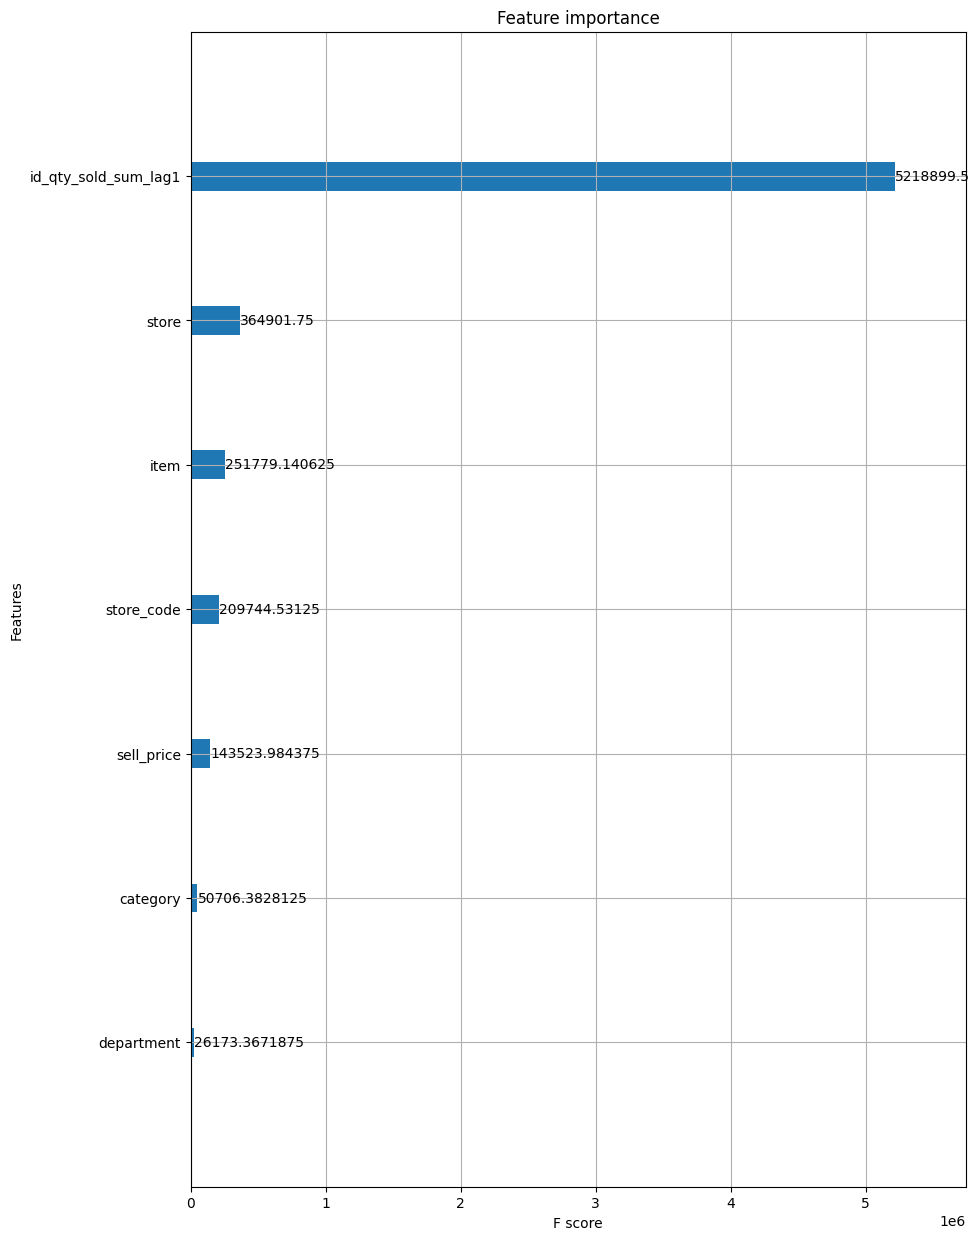

In [42]:
fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

In [ ]:
# Obtener métricas
results = model.evals_result()
# Gráfica de métricas
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# Métricas de entrenamiento
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
# Métricas de validação
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')
plt.legend()
plt.xlabel('Numero de Iteraciones')
plt.ylabel('RMSE')
plt.title('Desempeño del Modelo - Train vs Validation')
plt.show()

Predicción

In [43]:
if "qty_sold" in X_test.columns:
    X_test.drop("qty_sold", axis = 1, inplace = True)

Y_test_predict = model.predict(X_test)
X_test["qty_sold"] = Y_test_predict

In [44]:
X_test.reset_index(inplace = True)

In [45]:
X_test   #Todo el dataset + las ventas estimadas de mi modelo.

,id,item,category,department,store,store_code,region,sell_price,id_qty_sold_sum_lag1,qty_sold
0,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,7.0,0.0,0.0,10.9858,2.0,1.949877
1,ACCESORIES_1_001_BOS_2,0.0,0.0,0.0,6.0,1.0,0.0,10.9858,1.0,1.798236
2,ACCESORIES_1_001_BOS_3,0.0,0.0,0.0,0.0,2.0,0.0,10.9858,4.0,3.381473
3,ACCESORIES_1_001_NYC_1,0.0,0.0,0.0,2.0,3.0,1.0,11.1454,5.0,4.304231
4,ACCESORIES_1_001_NYC_2,0.0,0.0,0.0,3.0,4.0,1.0,11.1454,2.0,2.397193
...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_827_NYC_3,3048.0,2.0,6.0,8.0,5.0,1.0,1.2000,39.0,32.612030
30486,SUPERMARKET_3_827_NYC_4,3048.0,2.0,6.0,1.0,6.0,1.0,1.2000,0.0,0.013350
30487,SUPERMARKET_3_827_PHI_1,3048.0,2.0,6.0,4.0,7.0,2.0,1.2000,20.0,17.452347
30488,SUPERMARKET_3_827_PHI_2,3048.0,2.0,6.0,9.0,8.0,2.0,1.2000,17.0,17.696804


In [46]:
Y_train_predict = model.predict(X_train)
Y_valida_predict = model.predict(X_valida)

rmse_train = np.sqrt(
    mean_squared_error(
        y_true = Y_train,
        y_pred = Y_train_predict
    )
)

rmse_valida = np.sqrt(
    mean_squared_error(
        y_true = Y_valida,
        y_pred = Y_valida_predict
    )
)

rmse_train= str(round(rmse_train, 3)).replace(".", "_")
rmse_valida = str(round(rmse_valida, 3)).replace(".", "_")

In [47]:
print(f"Train RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_valida}")

Train RMSE: 9_794
Validation RMSE: 7_946


In [48]:
print(X_test.columns)

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'sell_price', 'id_qty_sold_sum_lag1', 'qty_sold'],
      dtype='object')


In [49]:
X_test[['id', 'qty_sold']].head()

,id,qty_sold
0,ACCESORIES_1_001_BOS_1,1.949877
1,ACCESORIES_1_001_BOS_2,1.798236
2,ACCESORIES_1_001_BOS_3,3.381473
3,ACCESORIES_1_001_NYC_1,4.304231
4,ACCESORIES_1_001_NYC_2,2.397193


In [50]:
(
    X_test[["id", "qty_sold"]]
    .to_csv(f"submission_train_{rmse_train}_valida_{rmse_valida}.csv", index = False)
)

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos en un DataFrame llamado df
# Asegúrate de que la columna 'yearweek' esté en formato datetime
df['yearweek'] = pd.to_datetime(df['yearweek'])

# Divide los datos en conjuntos de entrenamiento y prueba
train_data = df[df['yearweek'] < '2024-01-01']
test_data = df[df['yearweek'] >= '2024-01-01']

# Entrena el modelo XGBoost
model = XGBRegressor()
model.fit(train_data.drop(columns=['yearweek', 'qty_sold']), train_data['qty_sold'])

# Haz pronósticos para el conjunto de prueba
forecast = model.predict(test_data.drop(columns=['yearweek', 'qty_sold']))

# Calcula el error cuadrático medio
mse = mean_squared_error(test_data['qty_sold'], forecast)
print("Error cuadrático medio:", mse)


Pruebas MODELO ARIMA:

In [11]:
# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby(['id', 'qty_sold']).sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)

# Calcula la columna de acumulado ('acum_sales')
df_forecast3['qty_sold_acum'] = df_forecast3.groupby('id')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)


                             id  qty_sold  \
445643  SUPERMARKET_3_090_NYC_3      3976   
445642  SUPERMARKET_3_090_NYC_3      3016   
445641  SUPERMARKET_3_090_NYC_3      2568   
445640  SUPERMARKET_3_090_NYC_3      2412   
445639  SUPERMARKET_3_090_NYC_3      2394   
...                         ...       ...   
356768  SUPERMARKET_2_144_NYC_1         0   
356793  SUPERMARKET_2_144_NYC_2         0   
356809  SUPERMARKET_2_144_NYC_3         0   
356841  SUPERMARKET_2_144_NYC_4         0   
348200  SUPERMARKET_2_104_PHI_2         0   

                                                     item  \
445643                                  SUPERMARKET_3_090   
445642                                  SUPERMARKET_3_090   
445641                                  SUPERMARKET_3_090   
445640                                  SUPERMARKET_3_090   
445639                                  SUPERMARKET_3_090   
...                                                   ...   
356768  SUPERMARKET_2_144SUPERMA

In [ ]:
'''# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby(['id', 'qty_sold'])['sales_values'].sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='sales_values', ascending=False)

# Calcula la columna de acumulado de 'qty_sold' ('acum_qty_sold')
df_forecast3['acum_qty_sold'] = df_forecast3.groupby('id')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)'''

In [ ]:

'''# Agrupa por 'id' y 'qty_sold', sumando las 'sales_values' para cada grupo
df_forecast3 = df_forecast2.groupby['id']['qty_sold'].sum().reset_index()

# Ordena el DataFrame resultante por 'sales_values' en orden descendente
df_forecast3 = df_forecast3.sort_values(by='qty_sold', ascending=False)

# Calcula la columna de acumulado ('acum_sales')
df_forecast3['qty_sold_acum'] = df_forecast3.groupby('id', 'date')['qty_sold'].cumsum()

# Muestra el DataFrame resultante
print(df_forecast3)'''

In [9]:
df_forecast3.sort_values(["id", "yearweek"], ascending = True, inplace = True)
# Ordena el DataFrame, primero se ordena por la columna "id" de manera ascendente y, en caso de empate en "id",
# se ordena por la columna "yearweek" de manera ascendente también.

In [15]:
# Filtrar los "id" que representan el 60% de la facturación total. 5.292 registros/series temporales. #231.022.160 Sales 100%. Total 
df_forecast4=df_forecast3[df_forecast3['qty_sold_acum'] <= 0.6*df_forecast3['qty_sold_acum'].sum()]

In [16]:
df_forecast4.head(3)

,id,qty_sold,item,category,department,store,store_code,region,yearweek,sell_price,qty_sold_acum
445643,SUPERMARKET_3_090_NYC_3,3976,SUPERMARKET_3_090,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,201337,1.200,3976
445642,SUPERMARKET_3_090_NYC_3,3016,SUPERMARKET_3_090,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,201335,1.200,6992
445641,SUPERMARKET_3_090_NYC_3,2568,SUPERMARKET_3_090,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,201152,1.536,9560


In [17]:
dic_top_items=df_forecast4["id"] #Guardamos con nombre diccionario, para seleccionar sólo los "top_items" por id y
                                    # despues hacer merge con el dataframe grande, excluyendo los sin venta(df_forecast2)

In [18]:
dic_top_items #Comprobamos que efectivamente estén solo los "id"


445643    SUPERMARKET_3_090_NYC_3
445642    SUPERMARKET_3_090_NYC_3
445641    SUPERMARKET_3_090_NYC_3
445640    SUPERMARKET_3_090_NYC_3
445639    SUPERMARKET_3_090_NYC_3
                   ...           
356768    SUPERMARKET_2_144_NYC_1
356793    SUPERMARKET_2_144_NYC_2
356809    SUPERMARKET_2_144_NYC_3
356841    SUPERMARKET_2_144_NYC_4
348200    SUPERMARKET_2_104_PHI_2
Name: id, Length: 696401, dtype: object

In [20]:
df_sample= pd.merge(dic_top_items, df_forecast4, on='id', how='inner') #Hacemos merge, seleccionando solo los Top_items. 

In [21]:
df_sample.info() #df_sample, que incluye los id que hacen el 60% de la venta. Este es el input para empezar a aplicar modelo ARIMA y/o LGBM.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31299283 entries, 0 to 31299282
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   qty_sold       int64  
 2   item           object 
 3   category       object 
 4   department     object 
 5   store          object 
 6   store_code     object 
 7   region         object 
 8   yearweek       int64  
 9   sell_price     float64
 10  qty_sold_acum  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ GB


In [23]:
sorted(df_sample["yearweek"].unique())   

[201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201113,
 201114,
 201115,
 201116,
 201117,
 201118,
 201119,
 201120,
 201121,
 201122,
 201123,
 201124,
 201125,
 201126,
 201127,
 201128,
 201129,
 201130,
 201131,
 201132,
 201133,
 201134,
 201135,
 201136,
 201137,
 201138,
 201139,
 201140,
 201141,
 201142,
 201143,
 201144,
 201145,
 201146,
 201147,
 201148,
 201149,
 201150,
 201151,
 201152,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201213,
 201214,
 201215,
 201216,
 201217,
 201218,
 201219,
 201220,
 201221,
 201222,
 201223,
 201224,
 201225,
 201226,
 201227,
 201228,
 201229,
 201230,
 201231,
 201232,
 201233,
 201234,
 201235,
 201236,
 201237,
 201238,
 201239,
 201240,
 201241,
 201242,
 201243,
 201244,
 201245,
 201246,
 201247,
 201248,
 201249,
 201250,
 201251,
 201252,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 

In [24]:
sorted(df_sample["id"].unique())   

['ACCESORIES_1_001_BOS_1',
 'ACCESORIES_1_001_BOS_2',
 'ACCESORIES_1_001_BOS_3',
 'ACCESORIES_1_001_NYC_1',
 'ACCESORIES_1_001_NYC_2',
 'ACCESORIES_1_001_NYC_3',
 'ACCESORIES_1_001_NYC_4',
 'ACCESORIES_1_001_PHI_1',
 'ACCESORIES_1_001_PHI_2',
 'ACCESORIES_1_001_PHI_3',
 'ACCESORIES_1_002_BOS_1',
 'ACCESORIES_1_002_BOS_2',
 'ACCESORIES_1_002_BOS_3',
 'ACCESORIES_1_002_NYC_1',
 'ACCESORIES_1_002_NYC_2',
 'ACCESORIES_1_002_NYC_3',
 'ACCESORIES_1_002_NYC_4',
 'ACCESORIES_1_002_PHI_1',
 'ACCESORIES_1_002_PHI_2',
 'ACCESORIES_1_002_PHI_3',
 'ACCESORIES_1_003_BOS_1',
 'ACCESORIES_1_003_BOS_2',
 'ACCESORIES_1_003_BOS_3',
 'ACCESORIES_1_003_NYC_1',
 'ACCESORIES_1_003_NYC_2',
 'ACCESORIES_1_003_NYC_3',
 'ACCESORIES_1_003_NYC_4',
 'ACCESORIES_1_003_PHI_1',
 'ACCESORIES_1_003_PHI_2',
 'ACCESORIES_1_003_PHI_3',
 'ACCESORIES_1_004_BOS_1',
 'ACCESORIES_1_004_BOS_2',
 'ACCESORIES_1_004_BOS_3',
 'ACCESORIES_1_004_NYC_1',
 'ACCESORIES_1_004_NYC_2',
 'ACCESORIES_1_004_NYC_3',
 'ACCESORIES_1_004_NYC_4',
 

In [25]:
len(df_sample["id"].unique())

30490

In [27]:
len(df_sample["yearweek"].unique())

135047

In [26]:
sorted(df_sample["date"].unique()) 

['2011-01-31',
 '2011-02-07',
 '2011-02-14',
 '2011-02-21',
 '2011-02-28',
 '2011-03-07',
 '2011-03-14',
 '2011-03-21',
 '2011-03-28',
 '2011-04-04',
 '2011-04-11',
 '2011-04-18',
 '2011-04-25',
 '2011-05-02',
 '2011-05-09',
 '2011-05-16',
 '2011-05-23',
 '2011-05-30',
 '2011-06-06',
 '2011-06-13',
 '2011-06-20',
 '2011-06-27',
 '2011-07-04',
 '2011-07-11',
 '2011-07-18',
 '2011-07-25',
 '2011-08-01',
 '2011-08-08',
 '2011-08-15',
 '2011-08-22',
 '2011-08-29',
 '2011-09-05',
 '2011-09-12',
 '2011-09-19',
 '2011-09-26',
 '2011-10-03',
 '2011-10-10',
 '2011-10-17',
 '2011-10-24',
 '2011-10-31',
 '2011-11-07',
 '2011-11-14',
 '2011-11-21',
 '2011-11-28',
 '2011-12-05',
 '2011-12-12',
 '2011-12-19',
 '2011-12-26',
 '2012-01-02',
 '2012-01-09',
 '2012-01-16',
 '2012-01-23',
 '2012-01-30',
 '2012-02-06',
 '2012-02-13',
 '2012-02-20',
 '2012-02-27',
 '2012-03-05',
 '2012-03-12',
 '2012-03-19',
 '2012-03-26',
 '2012-04-02',
 '2012-04-09',
 '2012-04-16',
 '2012-04-23',
 '2012-04-30',
 '2012-05-

In [72]:
df_forecast.head(1)

,id,item,category,department,store,store_code,region,yearweek,date,qty_sold,sell_price,sales_values,day_of_week,month,quarter
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201104,2011-01-30,0,12.7414,0,6,1,1


In [78]:
#df_forecast['month'] = df_forecast['date'].dt.month

In [ ]:
#df_forecast2.set_index('date').resample('M')['sales_values'].sum()

In [17]:
df_forecast4

,id,qty_sold,sales_values,acum_sales
51187,ACCESORIES_1_354_BOS_3,141,17236,17236
51183,ACCESORIES_1_354_BOS_3,133,16260,33496
51190,ACCESORIES_1_354_BOS_3,148,13569,47065
51180,ACCESORIES_1_354_BOS_3,129,11829,58894
51203,ACCESORIES_1_354_BOS_3,177,10820,69714
...,...,...,...,...
73717,ACCESORIES_2_142_NYC_1,1,0,759
544816,SUPERMARKET_3_547_BOS_3,1,0,3388
73618,ACCESORIES_2_142_BOS_2,1,0,1521
544682,SUPERMARKET_3_547_BOS_2,1,0,4910


In [18]:
df_forecast2.groupby(['id', "store"]).get_group(('ACCESORIES_1_001_BOS_1', 'South_End'))

,id,item,category,department,store,store_code,region,yearweek,date,qty_sold,sell_price,sales_values
261,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201329,2013-07-22,4,10.9858,44
263,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201330,2013-07-29,4,10.9858,44
264,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201331,2013-07-29,2,10.9858,22
267,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201332,2013-08-12,1,10.9858,11
273,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201335,2013-09-02,2,10.9858,22
...,...,...,...,...,...,...,...,...,...,...,...,...
544,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201614,2016-04-04,1,10.9858,11
545,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201614,2016-04-11,1,10.9858,11
547,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201615,2016-04-18,2,10.9858,22
549,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201616,2016-04-25,4,10.9858,44


In [19]:
df_forecast2['date'] = pd.to_datetime(df_forecast['date'])  # Asegúrate de tener una columna 'date' en tu DataFrame
#df_forecast2.set_index('date', inplace=True)

In [12]:
df_forecast2['date'] = pd.to_datetime(df_forecast2['date'])

In [143]:
#df_forecast2.sort_index(inplace=True)

In [13]:
df_forecast2.head(1)           

,id,item,category,department,store,store_code,region,yearweek,date,qty_sold,sell_price,sales_values
261,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,201329,2013-07-22,4,10.9858,44


In [14]:
# groupby
# resample
# shift
# transform
(
    df_forecast2
    .set_index("date")
    .groupby(["id", "store"])
    .resample('M')
    ['qty_sold']
    .sum()
   

)

id                       store          date      
ACCESORIES_1_001_BOS_1   South_End      2013-07-31    10
                                        2013-08-31     1
                                        2013-09-30     6
                                        2013-10-31     4
                                        2013-11-30     8
                                                      ..
SUPERMARKET_3_827_PHI_3  Queen_Village  2015-12-31    41
                                        2016-01-31    37
                                        2016-02-29    58
                                        2016-03-31    60
                                        2016-04-30    23
Name: qty_sold, Length: 1527881, dtype: int64

In [178]:
# groupby
# resample
# shift
# transform
(
    df_forecast2
    .set_index("date")
    .groupby(["id", "store"])
    .resample('M')
    ['qty_sold']
    .sum()
    .to_frame()
    .reset_index()
   

)

,id,store,date,qty_sold
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8
...,...,...,...,...
1527876,SUPERMARKET_3_827_PHI_3,Queen_Village,2015-12-31,41
1527877,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-01-31,37
1527878,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-02-29,58
1527879,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-03-31,60


In [179]:
#lo voy a guardar

# groupby
# resample
# shift
# transform
gbdf = (
        df_forecast2
        .set_index("date")
        .groupby(["id", "store"])
        .resample('M')
        ['qty_sold']
        .sum()
        .to_frame()
        .reset_index()
   
)

gbdf

,id,store,date,qty_sold
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8
...,...,...,...,...
1527876,SUPERMARKET_3_827_PHI_3,Queen_Village,2015-12-31,41
1527877,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-01-31,37
1527878,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-02-29,58
1527879,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-03-31,60


In [15]:
#Añado el lag de qty_sold
# groupby
# resample
# shift
# transform
gbdf = (
        df_forecast2
        .set_index("date")
        .groupby(["id", "store"])
        .resample('M')
        ['qty_sold']
        .sum()
        .to_frame()
        .reset_index()
)

gbdf['qty_sold_lag1'] = gbdf.groupby(['id', 'store'])['qty_sold'].transform(
    lambda series: series.shift(1)
)
gbdf

,id,store,date,qty_sold,qty_sold_lag1
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10,NaN
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1,10.0
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6,1.0
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4,6.0
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8,4.0
...,...,...,...,...,...
1527876,SUPERMARKET_3_827_PHI_3,Queen_Village,2015-12-31,41,54.0
1527877,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-01-31,37,41.0
1527878,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-02-29,58,37.0
1527879,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-03-31,60,58.0


In [181]:
gbdf.isnull().sum()

id                   0
store                0
date                 0
qty_sold             0
qty_sold_lag1    30490
dtype: int64

In [182]:
df_forecast2['qty_sold'].value_counts()

qty_sold
1       1849716
2       1163315
3        788752
4        581995
5        440519
         ...   
1249          1
1213          1
1392          1
1180          1
1050          1
Name: count, Length: 978, dtype: int64

In [183]:
print(df_forecast2.columns)


Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'yearweek', 'date', 'qty_sold', 'sell_price', 'sales_values'],
      dtype='object')


In [185]:
gbdf[gbdf['qty_sold_lag1'].isnull()]['date'].unique() 

<DatetimeArray>
['2013-07-31 00:00:00', '2013-08-31 00:00:00', '2011-03-31 00:00:00',
 '2011-06-30 00:00:00', '2011-07-31 00:00:00', '2014-02-28 00:00:00',
 '2015-01-31 00:00:00', '2014-03-31 00:00:00', '2011-01-31 00:00:00',
 '2011-02-28 00:00:00', '2011-04-30 00:00:00', '2011-05-31 00:00:00',
 '2011-09-30 00:00:00', '2012-04-30 00:00:00', '2012-03-31 00:00:00',
 '2012-07-31 00:00:00', '2012-08-31 00:00:00', '2012-02-29 00:00:00',
 '2012-01-31 00:00:00', '2012-05-31 00:00:00', '2012-06-30 00:00:00',
 '2011-10-31 00:00:00', '2011-08-31 00:00:00', '2015-03-31 00:00:00',
 '2014-01-31 00:00:00', '2011-11-30 00:00:00', '2012-10-31 00:00:00',
 '2013-06-30 00:00:00', '2013-09-30 00:00:00', '2013-10-31 00:00:00',
 '2013-05-31 00:00:00', '2013-02-28 00:00:00', '2014-09-30 00:00:00',
 '2014-08-31 00:00:00', '2014-12-31 00:00:00', '2015-02-28 00:00:00',
 '2013-04-30 00:00:00', '2012-11-30 00:00:00', '2012-12-31 00:00:00',
 '2013-03-31 00:00:00', '2015-08-31 00:00:00', '2014-07-31 00:00:00',
 '20

In [198]:
def build_ts_features(df_forecast2, gb_list):

    gbdf = (
        df_forecast2
        .set_index("date")
        .groupby(["id", "store"])
        .resample('M')
        ['qty_sold']
        .sum()
        .to_frame()
        .reset_index()
)

    gbdf['qty_sold_lag1'] = gbdf.groupby(['id', 'store'])['qty_sold'].transform(
    lambda series: series.shift(1)
)
    return gbdf


In [199]:
gbdf = build_ts_features(
    df_forecast2 = df_forecast2,
    gb_list = ["id", "store"]

)
gbdf

,id,store,date,qty_sold,qty_sold_lag1
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10,NaN
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1,10.0
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6,1.0
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4,6.0
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8,4.0
...,...,...,...,...,...
1527876,SUPERMARKET_3_827_PHI_3,Queen_Village,2015-12-31,41,54.0
1527877,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-01-31,37,41.0
1527878,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-02-29,58,37.0
1527879,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-03-31,60,58.0


In [200]:
def build_ts_features(df_forecast2, gb_list, column = 'qty_sold'):
    new_name = "_".join(gb_list)

    gbdf = (
        df_forecast2
        .set_index("date")
        .groupby(["id", "store"])
        .resample('M')
        [column]
        .sum()
        .to_frame()
        .reset_index()
)

    gbdf[f"{new_name}qty_sold_lag1"] = gbdf.groupby(gb_list)[column].transform(
    lambda series: series.shift(1)
)
    return gbdf


In [201]:
gbdf = build_ts_features(
    df_forecast2 = df_forecast2,
    gb_list = ["id", "store"]

)
gbdf

,id,store,date,qty_sold,id_storeqty_sold_lag1
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10,NaN
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1,10.0
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6,1.0
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4,6.0
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8,4.0
...,...,...,...,...,...
1527876,SUPERMARKET_3_827_PHI_3,Queen_Village,2015-12-31,41,54.0
1527877,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-01-31,37,41.0
1527878,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-02-29,58,37.0
1527879,SUPERMARKET_3_827_PHI_3,Queen_Village,2016-03-31,60,58.0


In [16]:
def build_ts_features(df_forecast2, gb_list,target_column, agg_func, agg_func_name):
    new_name = "_".join(gb_list)

    gbdf = (
        df_forecast2
        .set_index("date")
        .groupby(["id", "store"])
        .resample('M')
        ['qty_sold']
        .sum()
        .to_frame()
        .reset_index()
)

    gbdf[f"{new_name}qty_sold_lag1"] = gbdf.groupby(gb_list)['qty_sold'].transform(
    lambda series: series.shift(1)
)
    return gbdf 

In [17]:
GB_LIST = ["id", "store"]
TARGET_COLUMN = "qty_sold"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "sum"

vars_ts_ = build_ts_features(
    df_forecast2 = df_forecast2,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME

)

vars_ts_.head(10)

,id,store,date,qty_sold,id_storeqty_sold_lag1
0,ACCESORIES_1_001_BOS_1,South_End,2013-07-31,10,NaN
1,ACCESORIES_1_001_BOS_1,South_End,2013-08-31,1,10.0
2,ACCESORIES_1_001_BOS_1,South_End,2013-09-30,6,1.0
3,ACCESORIES_1_001_BOS_1,South_End,2013-10-31,4,6.0
4,ACCESORIES_1_001_BOS_1,South_End,2013-11-30,8,4.0
5,ACCESORIES_1_001_BOS_1,South_End,2013-12-31,11,8.0
6,ACCESORIES_1_001_BOS_1,South_End,2014-01-31,5,11.0
7,ACCESORIES_1_001_BOS_1,South_End,2014-02-28,5,5.0
8,ACCESORIES_1_001_BOS_1,South_End,2014-03-31,10,5.0
9,ACCESORIES_1_001_BOS_1,South_End,2014-04-30,11,10.0


In [18]:
print(df_forecast2.shape)

df_forecast_to_train = pd.merge(df_forecast2, vars_ts_, on = ["date"] + GB_LIST, how = "left")

print(df_forecast2.shape)

(7502332, 12)
(7502332, 12)


In [ ]:
#df_encoded = pd.get_dummies(df_forecast_to_train, columns=['category', 'department', 'store', 'store_code', 'region'])

In [219]:
df_forecast_to_train.columns.tolist()

['id',
 'item',
 'category',
 'department',
 'store',
 'store_code',
 'region',
 'yearweek',
 'date',
 'qty_sold_x',
 'sell_price',
 'sales_values',
 'qty_sold_y',
 'id_storeqty_sold_lag1']

In [220]:
df_forecast_to_train.isnull().sum()

id                             0
item                           0
category                       0
department                     0
store                          0
store_code                     0
region                         0
yearweek                       0
date                           0
qty_sold_x                     0
sell_price                     0
sales_values                   0
qty_sold_y               7214944
id_storeqty_sold_lag1    7236194
dtype: int64

In [27]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 880.9 kB/s eta 0:01:54
   ---------------------------------------- 0.8/99.8 MB 4.9 MB/s eta 0:00:21
   - -------------------------------------- 2.7/99.8 MB 13.3 MB/s eta 0:00:08
   -- ------------------------------------- 5.9/99.8 MB 23.4 MB/s eta 0:00:05
   --- ------------------------------------ 7.5/99.8 MB 26.7 MB/s eta 0:00:04
   --- ------------------------------------ 7.5/99.8 MB 26.7 MB/s eta 0:00:04
   --- ------------------------------------ 8.6/99.8 MB 22.1 MB/s eta 0:00:05
   ---- ----------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
